In [179]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup

title = []
link = [] 

url = "https://sports.qq.com/"

data = requests.get(url)

soup = BeautifulSoup(data.text)

data1 = soup.select("div.scr-news")

for i in data1[0].select("li"):
    title.append(i.get_text())
    
for i in data1[0].select("li a[href]"):
    link.append(i.get('href'))

df_1 = pd.DataFrame({'Title':title,
                   'Link':link}                        
)

df_1

,Title,Link
0,CBA北京主场19分惨负浙江 林书豪低迷21投仅5中,https://sports.qq.com/cba/
1,又内讧？！八一球员雷蒙场边怒怼王治郅 赶紧被队友捂嘴拉走,https://v.qq.com/x/cover/mzc00200zbpn6r4/x0033...
2,21中5！林书豪又遇惨败，主帅暴怒扔战术笔，奇葩战术坑惨北京,https://view.inews.qq.com/a/20191220A0TOVT00
3,广东6人得分上双大胜天津获两连胜 布鲁克斯36分阿联15+9,https://view.inews.qq.com/a/SPO2019122002593400
4,CBA全明星第二期票选公布：易建联蝉联票王 韩德君进入先发,http://view.inews.qq.com/a/20191220A0GTH400
5,8:30视频直播独行侠vs76人 8:30直播太阳vs雷霆,https://sports.qq.com/nba/
6,浓眉一绝招成湖人法宝，打雄鹿老詹真不好使还得靠他,http://view.inews.qq.com/a/20191220A0MLDW00
7,社交圈：湖人板凳表现遭调侃 他们是否后悔没签安东尼？,http://view.inews.qq.com/a/20191220A0P5DW00
8,红黑榜：字母哥破43年纪录 詹姆斯赛后评价就一个动作,http://view.inews.qq.com/a/20191220A0I82R00
9,数据帝：一人变身詹皇终结者 快船一项49连胜纪录终结,http://view.inews.qq.com/a/20191220A0IZKE00


In [154]:
import requests 
from bs4 import BeautifulSoup

title = []
link = []
company = []
location = []

page = list(range(10,60,10))

for i in page:
    
    url = 'https://www.indeed.com/jobs?q=data+analyst&l=California&start='
    address = requests.get(url)
    soup = BeautifulSoup(address.text)
    data= soup.find_all('div',{'class':'title'})
    
    # title
    for i in range(0,len(data)):
        title.append(data[i].select('div.title a')[0].get('title'))   
    # link
    for i in range(0,len(data)):
        link.append('https://www.indeed.com'+data[i].select('div.title a[href]')[0].get('href'))
    
    # company
    data3 = soup.select('div.sjcl')
    for i in range(0,len(data3)):
        company.append(data3[i].select('div')[0].get_text().replace('\n',''))
    
    # location:
    for i in range(0,len(data3)):
        location.append(data3[i].select('div')[1].get('data-rc-loc')) 
        
    url = 'https://www.indeed.com/jobs?q=data+analyst&l=California&start={}'.format(str(i))
    
df = pd.DataFrame(
    {
        'Title':title,
        "Company":company,
        "Location":location,
        "Link":link
    }
) 

display(df)

,Title,Company,Location,Link
0,Data Analyst,3 Phases Renewables,"El Segundo, CA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,Data Analyst,"Amora Lighting, LLC","Chico, CA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,Data Analyst,"KW Companies, Inc.","Rancho Dominguez, CA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,Senior Database Analyst - Data Warehouse,Cedars-Sinai4.2,"Los Angeles, CA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
4,Data Analyst/Data Scientist,Quicken Inc.,"Menlo Park, CA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
...,...,...,...,...
90,DATA ANALYST,SAC Health System3.3,"San Bernardino, CA",https://www.indeed.com/rc/clk?jk=56bb94dc65623...
91,Data Analyst : 19-05384,Akraya Inc.3.6,"Oakland, CA",https://www.indeed.com/rc/clk?jk=384bab9ec9347...
92,Entry Level Business Analyst,Cloudinfraspecs,"Los Angeles, CA",https://www.indeed.com/company/Cloudinfraspecs...
93,SQL Developer/EDI Data Analyst,Staff Benefits Management and Administrators,"San Diego, CA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...


In [116]:
for i in data:
    print(i.select('a')[0].get('href'))

https://www.28hse.com/rent-property-1031003.html
https://www.28hse.com/rent-property-1030907.html
https://www.28hse.com/rent-property-1023122.html
https://www.28hse.com/rent-property-1029437.html
https://www.28hse.com/rent-property-1030643.html
https://www.28hse.com/rent-property-1030992.html
https://www.28hse.com/rent-property-1024892.html
https://www.28hse.com/rent-property-1024883.html
https://www.28hse.com/rent-property-1030859.html
https://www.28hse.com/rent-property-1030852.html
https://www.28hse.com/rent-property-685489.html
https://www.28hse.com/rent-property-1030834.html
https://www.28hse.com/rent-property-1030830.html
https://www.28hse.com/rent-property-1030623.html
https://www.28hse.com/rent-property-1030595.html


In [127]:
import re
import requests
import numpy as np 
import pandas as pd
from bs4 import BeautifulSoup

pages = list(range(1,11))

title = [] 
construction = []
price_list = []
effective = []
characteristics = []
agent = []
location = []
link = []

for page in pages:
    url = "https://www.28hse.com/rent/district-64/list-{}".format(page)
    
    #1 locates the url
    data = requests.get(url)
    soup = BeautifulSoup(data.text)
    data = soup.select('div.right.content_me_div')

    #2 get the location
    for i in [i.select('div.catname a[href]') for i in data]:
        if len(i) == 2:
            location.append(i[0].get_text() + ' ' + i[1].get_text())
        else:
            location.append(i[0].get_text())

    #3 get the rent of each properties
    price = soup.find_all('li',{'class':"info_price"})
    for i in price:
        price_list.append(i.text.replace('租','').replace(',','').replace('\xa0',''))

    # get the characteristics of each properties
    p = [i.select('p') for i in data]
    for i in p:
        title.append(i[0].get_text())
        construction.append(i[1].get_text().replace('\xa0','').replace('建築面積 :',''))
        effective.append(i[2].get_text().replace('\xa0','').replace('實用面積:',''))
        characteristics.append(i[3].get_text().replace('\xa0',''))
        agent.append(i[4].get_text().replace('\xa0','').replace('心水樓盤','').strip())
        
    # get the url of each property
    for i in data:
        link.append(i.select('a')[0].get('href'))

In [167]:
dict1 = dict(zip(['標題','位置','租金',"建築面積",'實際面積','特點','中介','連結'],
                 [title,location,price_list,construction,effective,characteristics,agent,link]
            )
        )

df = pd.DataFrame(dict1)

df['租金'] = pd.to_numeric(df['租金'])

pos = []

for i in df['建築面積']:
    pos.append([i.span()[0] for i in re.finditer(r'呎', i)])

ac = [] 

for i, a in zip(df['建築面積'],pos):
    if len(a):
        ac.append(float(i[0:a[0]]))
    else:
        ac.append(np.nan)
        
df['建築面積'] = ac  

df_rent = df.loc[(df['特點'].str.contains('住宅') == False) &(df['租金'] < 10000),:]

display(df_rent)

,標題,位置,租金,建築面積,實際面積,特點,中介,連結
0,"荔枝角新裝免佣小型工作室,迷你倉",荔枝角 通源工業大廈,4300,120.0,--,工商,業主自讓盤,https://www.28hse.com/rent-property-672891.html
1,全新裝修 鄰近D2 Two Place 2分鐘直達地鐵,荔枝角,5500,225.0,--,"工商, 分租高層",業主自讓盤,https://www.28hse.com/rent-property-1019835.html
2,荔枝角小型工作間出租,荔枝角 億利工業中心,7800,250.0,--,"工商, 短租高層",業主自讓盤,https://www.28hse.com/rent-property-683802.html
3,全新裝修、電器，3分鐘到地鐵，平租，免佣,荔枝角 嘉名工廠大廈,3800,190.0,--,工商高層,業主自讓盤,https://www.28hse.com/rent-property-893050.html
4,2分鐘直達地鐵 鄰近D2 Two商場 全新裝修,荔枝角,8000,297.0,--,工商高層,業主自讓盤,https://www.28hse.com/rent-property-1005636.html
12,樓上舖放租,荔枝角 嘉名工廠大廈,7500,380.0,--,工商,置業商機,https://www.28hse.com/rent-property-704870.html
24,"近地鐵站交通方便,有窗內厠",荔枝角 永盛工業大廈,6500,450.0,--,工商,世紀21奇豐物業,https://www.28hse.com/rent-property-1031666.html
25,有窗四正單位,荔枝角 合興工業大廈,9980,480.0,--,工商,世紀21奇豐物業,https://www.28hse.com/rent-property-1032293.html
44,樓上舖,荔枝角 匯華工廠大廈,5500,280.0,--,工商,置業商機,https://www.28hse.com/rent-property-684558.html
45,四正有窗,荔枝角 香港工業中心,7800,380.0,--,工商,置業商機,https://www.28hse.com/rent-property-1007761.html


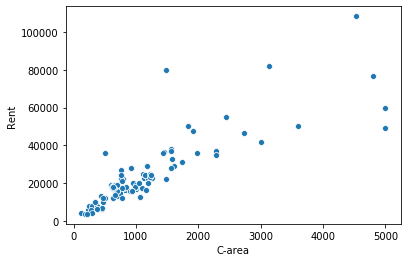

In [178]:

# plot the construction area versus rent
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(df['建築面積'],
                df['租金'],
               )

plt.xlabel('C-area')
plt.ylabel('Rent')

plt.show() 